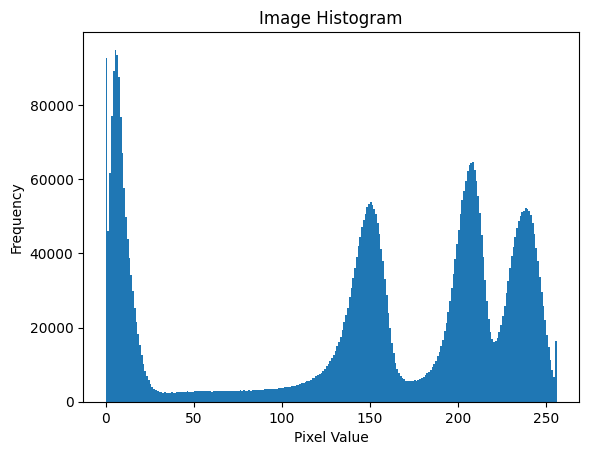

In [1]:
# Load an image
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('D:/project on filter/novel/original.jpg')
#r=cv2.imread('3rd.jpg')



#Hist

pixel_values = image.flatten()

# Plot the histogram
plt.hist(pixel_values, bins=256, range=[0, 256])
plt.title('Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


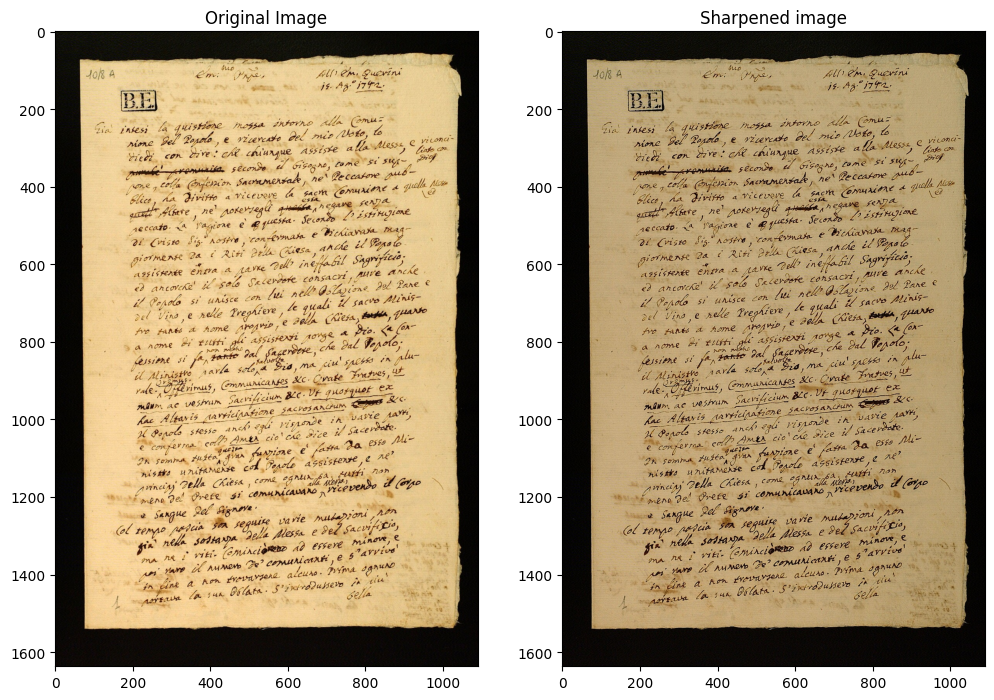

In [2]:


# Load an image
image = cv2.imread('D:/project on filter/novel/original.jpg')

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Calculate the sharpened image by subtracting the blurred image from the original
sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.7, 0)


display = [image, sharpened_image]
label = ['Original Image', 'Sharpened image']
# Save the segmented image
#cv2.imwrite('segmented_image.jpg', segmented_image)


fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(1, 2, i+1)
    # Convert BGR to RGB for matplotlib
    plt.imshow(cv2.cvtColor(display[i], cv2.COLOR_BGR2RGB))
    plt.title(label[i])

plt.show()



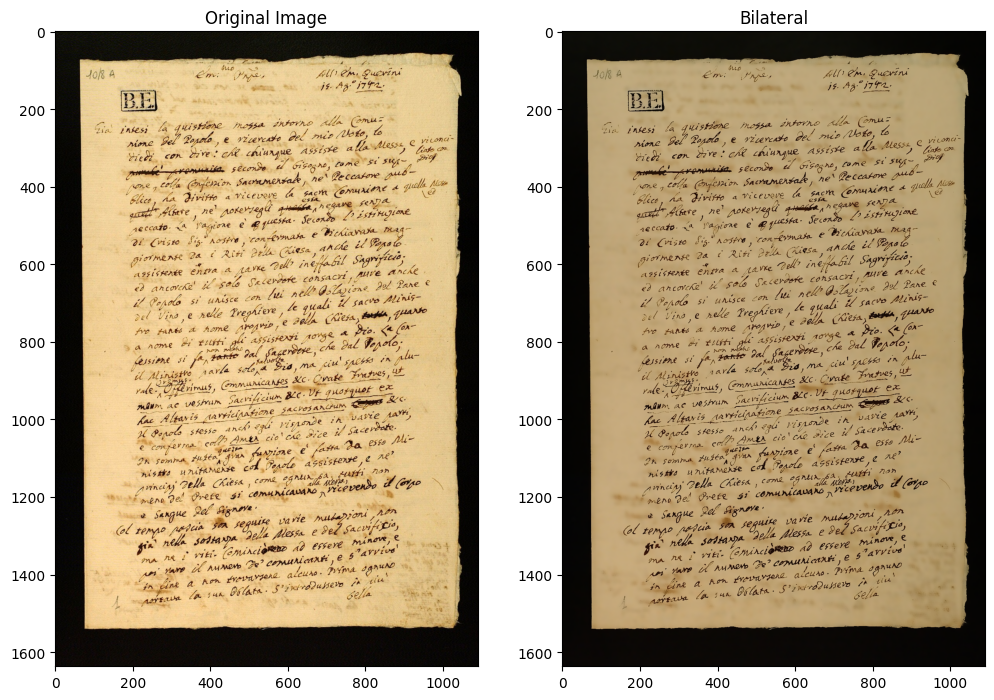

In [3]:
# Apply Bilateral filter
blurred_image = cv2.bilateralFilter(
    sharpened_image, 15, 100, 100)  # was 65 , 65
image2 = blurred_image




display = [image, image2]
label = ['Original Image', 'Bilateral']
# Save the segmented image
#cv2.imwrite('segmented_image.jpg', segmented_image)


fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(1, 2, i+1)
    # Convert BGR to RGB for matplotlib
    plt.imshow(cv2.cvtColor(display[i], cv2.COLOR_BGR2RGB))
    plt.title(label[i])

plt.show()

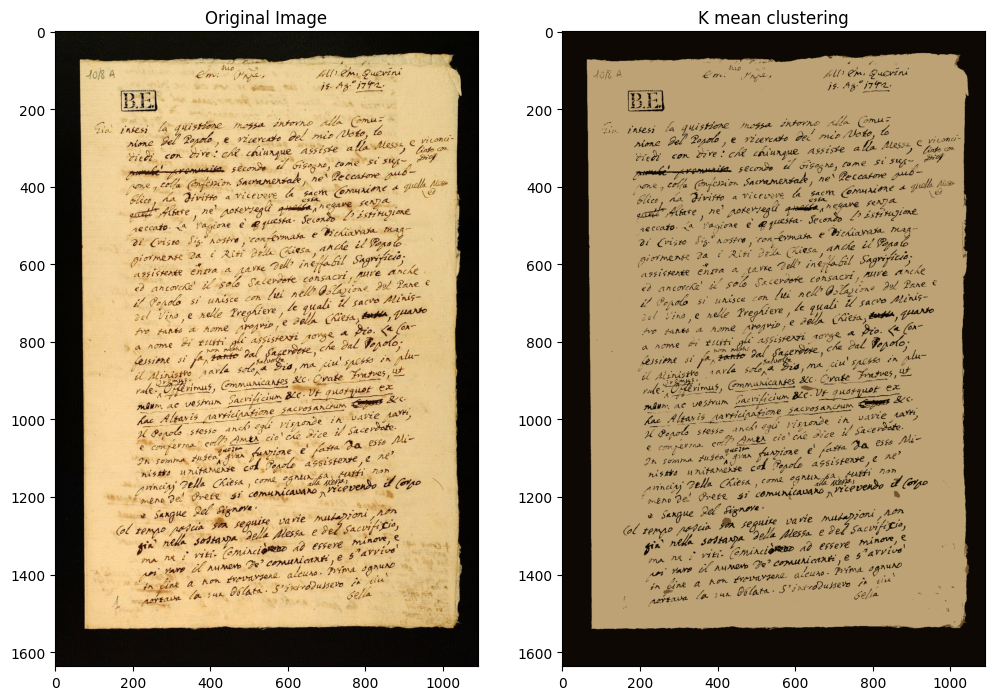

In [4]:
pixels = image2.reshape((-1, 3))

# Convert to float32 for K-means clustering
pixels = np.float32(pixels)

# Define the number of clusters (segments) you want
num_clusters = 3  # was 5

# Apply K-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(
    pixels, num_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers back to uint8
centers = np.uint8(centers)

# Assign each pixel to one of the clusters
segmented_image = centers[labels.flatten()].reshape((image.shape))



display = [image, segmented_image]
label = ['Original Image', 'K mean clustering']
# Save the segmented image
#cv2.imwrite('segmented_image.jpg', segmented_image)


fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(1, 2, i+1)
    # Convert BGR to RGB for matplotlib
    plt.imshow(cv2.cvtColor(display[i], cv2.COLOR_BGR2RGB))
    plt.title(label[i])

plt.show()

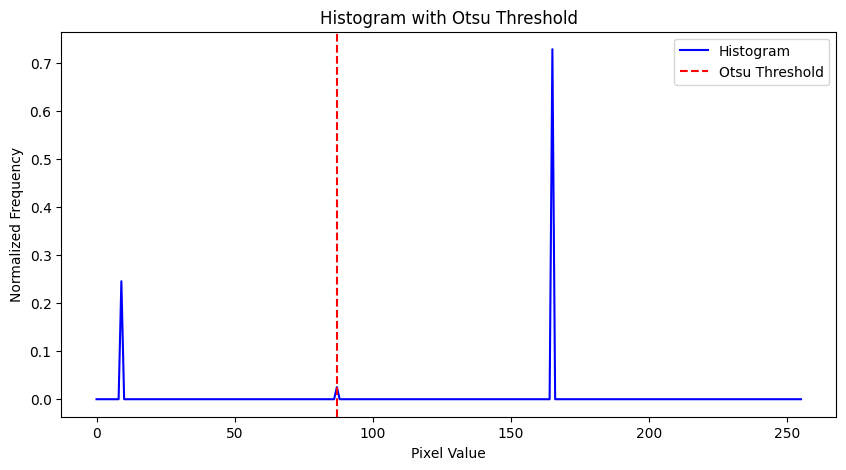

In [5]:
gray_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2GRAY)

# Calculate the histogram
hist, bins = np.histogram(gray_image.flatten(), bins=256, range=[0, 256])

# Normalize the histogram to obtain probabilities
hist_normalized = hist / np.sum(hist)

# Compute cumulative distribution function (CDF)
cdf = np.cumsum(hist_normalized)

# Calculate Otsu's threshold
otsu_threshold_value, _ = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.plot(bins[:-1], hist_normalized, color='b', label='Histogram')
plt.axvline(x=otsu_threshold_value, color='r', linestyle='--', label='Otsu Threshold')
plt.title('Histogram with Otsu Threshold')
plt.xlabel('Pixel Value')
plt.ylabel('Normalized Frequency')
plt.legend()
plt.show()



# Set a thresho

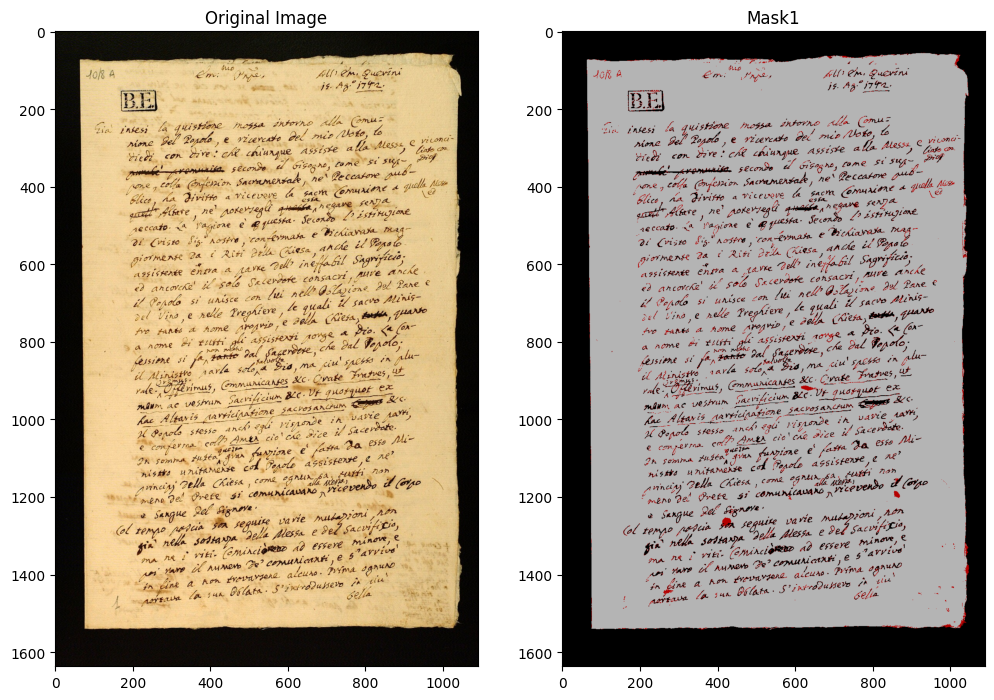

In [6]:
threshold_value = 90
mask = np.where(segmented_image > threshold_value, 180, 0).astype(np.uint8)


display = [image, mask]
label = ['Original Image', 'Mask1']
# Save the segmented image
#cv2.imwrite('segmented_image.jpg', segmented_image)


fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(1, 2, i+1)
    # Convert BGR to RGB for matplotlib
    plt.imshow(cv2.cvtColor(display[i], cv2.COLOR_BGR2RGB))
    plt.title(label[i])

plt.show()

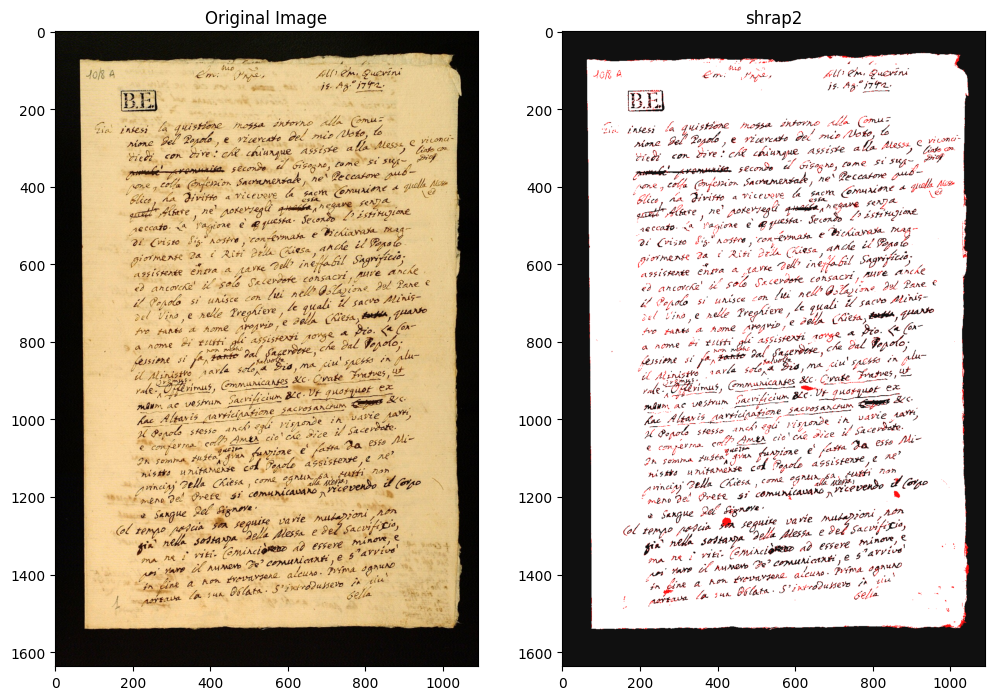

In [7]:
contrast = 1.5  # was 1.5
brightness = 16  # was 10

adjusted_image = cv2.convertScaleAbs(mask, alpha=contrast, beta=brightness)


display = [image, adjusted_image]
label = ['Original Image', 'shrap2']
# Save the segmented image
#cv2.imwrite('segmented_image.jpg', segmented_image)


fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(1, 2, i+1)
    # Convert BGR to RGB for matplotlib
    plt.imshow(cv2.cvtColor(display[i], cv2.COLOR_BGR2RGB))
    plt.title(label[i])

plt.show()




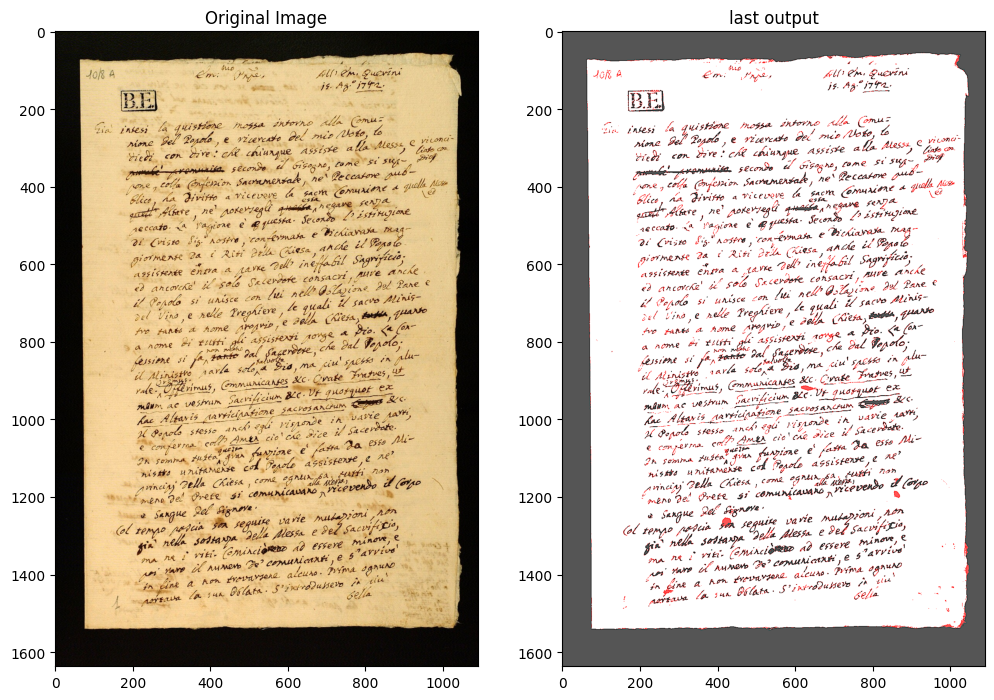

In [8]:
blurred_image11 = cv2.GaussianBlur(adjusted_image, (5,5), 0)
sharpened_image11 = cv2.addWeighted(adjusted_image, 3.0, blurred_image11, -0.7,0 )

blurred_image111 = cv2.GaussianBlur(sharpened_image11, (5,5), 0)
sharpened_image111 = cv2.addWeighted(sharpened_image11, 3.0, blurred_image111, -0.7,0 )


display = [image, sharpened_image111]
label = ['Original Image', 'last output']
# Save the segmented image
#cv2.imwrite('segmented_image.jpg', segmented_image)


fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(1, 2, i+1)
    # Convert BGR to RGB for matplotlib
    plt.imshow(cv2.cvtColor(display[i], cv2.COLOR_BGR2RGB))
    plt.title(label[i])

plt.show()


In [10]:
from PIL import Image
import pytesseract

def image_text_quality(image_path):
    try:
        # Open the image
        img = Image.open(image_path)
        
        # Use pytesseract to perform OCR on the image
        extracted_text = pytesseract.image_to_string(img)
        #print(extracted_text)
        
        # Measure text length and readability
        #  metrics (you can add more metrics as needed)
        text_length = len(extracted_text)
        readability_score = 10 - text_length  # Example: simple metric based on text length
        
        return readability_score
    
    except IOError:
        print("Unable to load image.")
        return None

# Provide the file paths of the images you want to compare
image1_path = "D:/project on filter/original.jpg"
image2_path = "D:/project on filter/thelastoutput.jpg"

# Get text quality metrics for each image
text_quality1 = image_text_quality(image1_path)
#print(text_quality1)
text_quality2 = image_text_quality(image2_path)
#print(text_quality2)

if text_quality1 is not None and text_quality2 is not None:
    # Simple comparison based on readability score
    if text_quality1 > text_quality2:
        print("Image 1 has better text readability.")
    elif text_quality2 > text_quality1:
        print("Image 2 has better text readability.")
    else:
        print("Both images have similar text readability.")

Image 2 has better text readability.
